In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [17]:
X_train = pd.read_csv('data_public/x_train.csv', header=None)
Y_train = pd.read_csv('data_public/y_train.csv', header=None)
Y_train.columns = ['target']
X_test = pd.read_csv('data_public/x_test.csv')

In [18]:
d = pd.DataFrame(index=X_train.index)
d['target'] = Y_train
d['kurtosis'] = X_train.apply(lambda row: stats.kurtosis(row), axis=1)
d['entropy'] = X_train.apply(lambda row: stats.entropy(row), axis=1)
d['std'] = X_train.apply(lambda row: np.std(row)**2, axis=1)
d['normal_stat'] = X_train.apply(lambda row: stats.normaltest(row)[0], axis=1)
d['mean'] = X_train.apply(lambda row: np.mean(row), axis=1)
d.head()

,target,kurtosis,entropy,std,normal_stat,mean
0,1,-1.982143,2.772589,0.248889,222.464936,0.533333
1,1,-1.982143,2.772589,0.248889,222.464936,0.533333
2,1,-2.000000,2.708050,0.250000,279.252501,0.500000
3,0,-1.927602,2.833213,0.245556,132.604517,0.566667
4,2,-1.693780,2.944439,0.232222,37.087925,0.633333


In [29]:
X = d.drop(['target'], axis = 1)

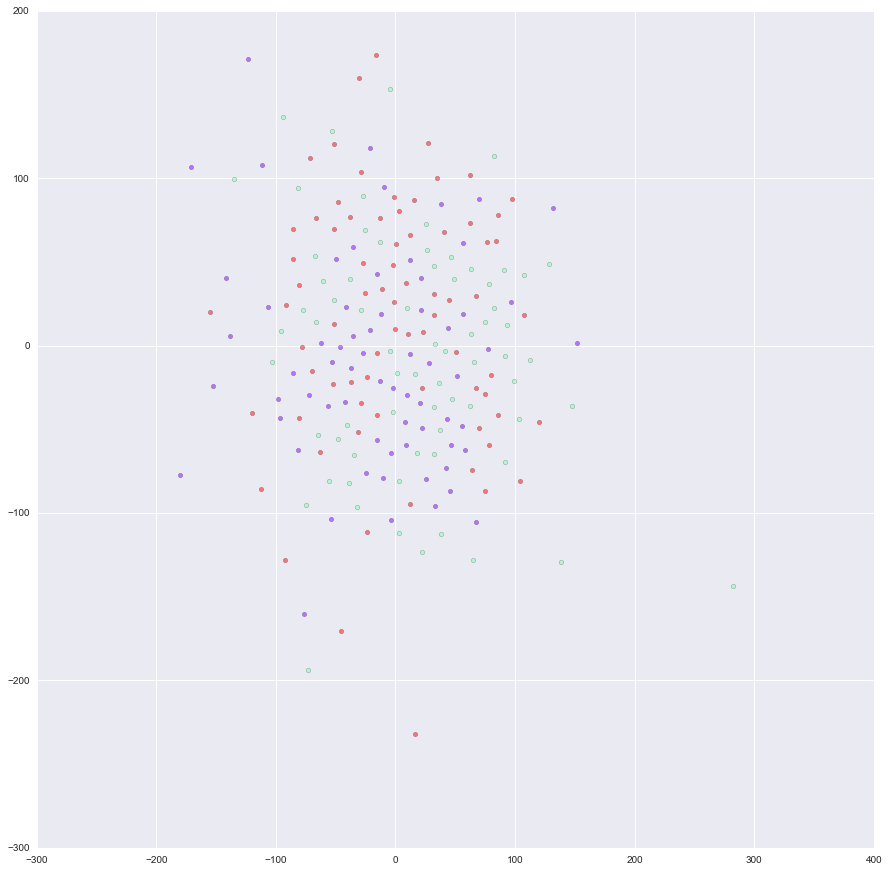

In [63]:
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=42, init='pca')
X_train_low = tsne.fit_transform(scaler.fit_transform(X_train))
plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(Y_train.target))))
for y_, c in zip(set(Y_train.target), colors):
    plt.scatter(X_train_low[Y_train.target.values==y_, 0], 
                X_train_low[Y_train.target.values==y_, 1], c=c, alpha=0.5, label=str(y_))

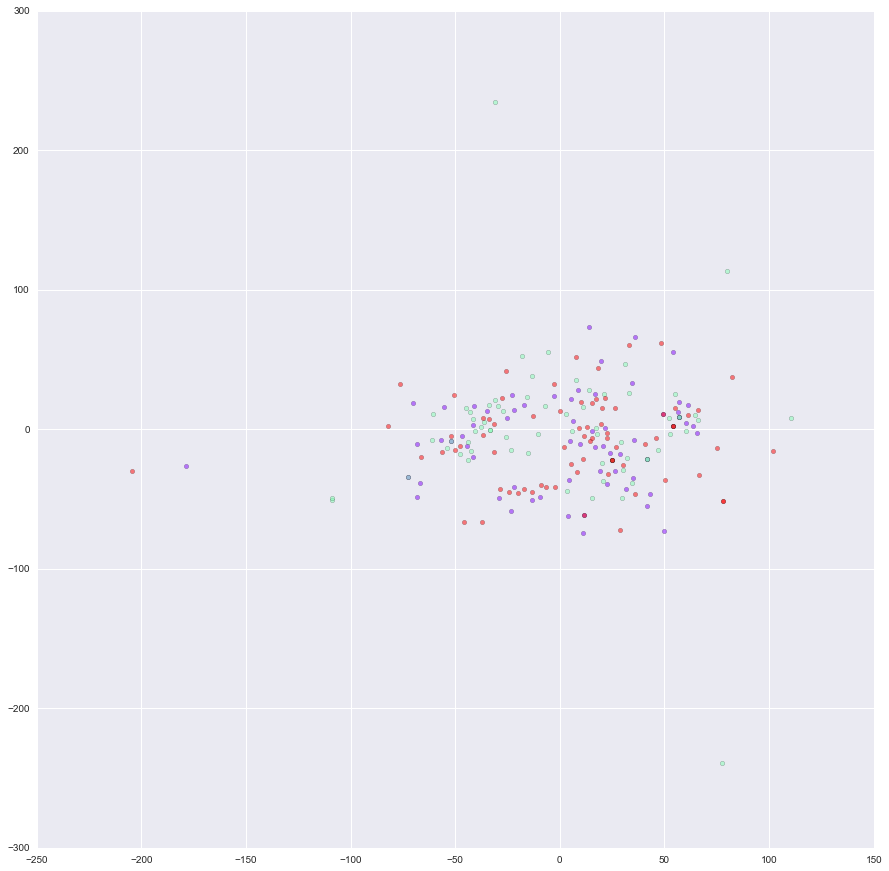

In [62]:
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=42, init='pca')
X_low = tsne.fit_transform(scaler.fit_transform(X))
plt.subplots(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, len(set(Y_train.target))))
for y_, c in zip(set(Y_train.target), colors):
    plt.scatter(X_low[Y_train.target.values==y_, 0], 
                X_low[Y_train.target.values==y_, 1], c=c, alpha=0.5, label=str(y_))

In [67]:
def knn(X, y):
    clf = KNeighborsClassifier()
    params = {
        'n_neighbors': [5, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20], 
        'metric': ['hamming', 'jaccard', 'minkowski'],
        'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(clf, param_grid=params, cv=StratifiedKFold(5, random_state=42), scoring='accuracy')
    grid_search.fit(X, y)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    return grid_search

x = pd.concat([X, pd.DataFrame(X_low, columns=['low_0', 'low_1']), X_train], axis=1)
y = Y_train.target
knn_clf = knn(x, y)

Best score: 0.47619047619047616
Best parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'hamming'}


In [59]:
xgb_clf = xgb.XGBClassifier(n_estimators=100)
y = d.target.ravel()
x = d.drop(['target'], axis=1)
scores = cross_val_score(clf, x, y , cv=StratifiedKFold(5, random_state=42), scoring='accuracy')
print("Score: {} (+/- {})".format(scores.mean(), scores.std() ** 2))

Score: 0.4375692137320044 (+/- 0.0016819933309541592)


In [77]:
d_test = pd.DataFrame(index=X_test.index)
d_test['kurtosis'] = X_test.apply(lambda row: stats.kurtosis(row), axis=1)
d_test['entropy'] = X_test.apply(lambda row: stats.entropy(row), axis=1)
d_test['std'] = X_test.apply(lambda row: np.std(row)**2, axis=1)
d_test['normal_stat'] = X_test.apply(lambda row: stats.normaltest(row)[0], axis=1)
d_test['mean'] = X_test.apply(lambda row: np.mean(row), axis=1)
d_test.head()

,kurtosis,entropy,std,normal_stat,mean
0,-1.833333,2.484907,0.240000,71.292477,0.400000
1,-1.927602,2.564949,0.245556,132.604517,0.433333
2,-1.982143,2.639057,0.248889,222.464936,0.466667
3,-1.927602,2.833213,0.245556,132.604517,0.566667
4,-1.982143,2.639057,0.248889,222.464936,0.466667


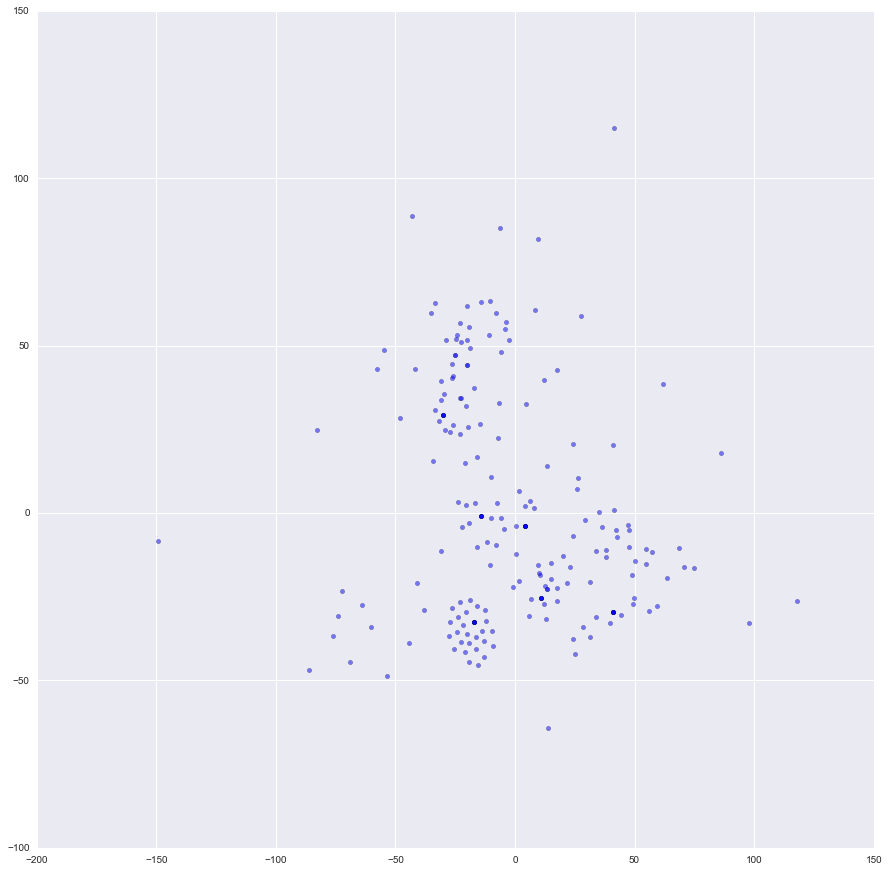

In [78]:
scaler = StandardScaler()
tsne = TSNE(n_components=2, random_state=42, init='pca')
X_test_low = tsne.fit_transform(scaler.fit_transform(d_test))
plt.subplots(figsize=(15,15))
plt.scatter(X_test_low[:, 0], X_test_low[:,1], alpha=0.5)